# Fitness Comparisons

This notebook examines cases where individuals should join a group of size $x-1$ to form a group of size $x$, or when they should leave a group of size $x$ to be alone

We do this by plotting the regions in which $W(x) > W(1)$ (or vice versa)

# Load Packages and Global Variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
final_fig_path = "../CH_Manuscript/Figures/"
import sys
sys.path.insert(1, 'Functions')
from fitness_funs_non_dim import *
from sim_graph_funs import *

In [2]:
colors_x = ['k', 'b', 'r', 'm']

# Functions Specific to this Notebook

# If time to catch prey is negligible

In [10]:
def curve_xgroup_form(x,N1,N2, if_scale = False,**params):
    '''
    Finds the beta1/beta2 curve such that if beta1/beta2 above this curve, 
    groups of size x should form
    for 
    '''
    # compares fitness in grouop of size x to size 1
    # per capita fun responses

    # if H1 is calculated using scaling law
    if if_scale: # so H1 = H2 * β1/β2
        # makes using alpha1 and alpha2 easier
        α1 = lambda x: fun_alpha1(x,**params.copy())
        α2 = lambda x: fun_alpha2(x,**params.copy())
        A1 = params['A1']
        A2 = params['A2']
        denominator = A1*N1 * (α1(x) - x * α1(1))
        if denominator > 0:
            numerator = A2*N2 * (x * α2(1) - α2(x))
            bratio_curve = numerator/denominator
            return bratio_curve
        else:
            return np.nan
    # if H1 is set parameter
    else:
        Y1_1 = fun_f1(1,N1,N2,**params)
        Y1_2 = (1/x) * fun_f1(x,N1,N2,**params)
        Y2_1 = fun_f2(1,N1,N2,**params)
        Y2_2 = (1/x)*fun_f2(x,N1,N2,**params)

        denominator = Y1_2 - Y1_1
        if denominator > 0:
            bratio_curve = (Y2_1 - Y2_2) / denominator
            return bratio_curve
        else:
            return np.nan



def plot_conditions_x_form(x, H1, H2, α2_fun_type, fig = None, ax = None, 
                           if_legend = False, 
                           color = 'b', s1 = 2, s2 = 2, α2_of_1 = 0.95, β1=1, β2=1
                           ,A1=0.5,A2=0.5,
                   α1_of_1=0.05, if_scale = False, lw = 1, N2=0.5,**params):
    '''
    plots beta1/beta2 curve at boundary, using curve_xgroups_form, 
    where groups of size x (listed in xvals) should form when
    solitaries and groups of size x - 1 meet

    parameters:
        Required:
        x - group size
        H1, H2 - handling times of big prey and small prey. If H1 = None, assumes H1/H2 = beta1/beta2
        α2_fun_type: "sigmoid" or "constant"
        optional parameters: for other function parameters in params_base, 
        also for determining figure/ax etc
    returns:
    ax, fig
    '''
    # plots regions where groups of size x (listed in xvals) forms
    # xvals can have up to 2 entries
    params_base = dict(β1=β1, β2=β2, 
                       H1a = 0, H1b=H1, H2a = 0, H2b =H2, 
                       A1=A1, A2 = A2,
                   α1_of_1 = α1_of_1, α2_of_1=α2_of_1, 
                   s1=s1, s2=s2, 
                   α2_fun_type=α2_fun_type)
                
    # Define the range for N1
    N1_values = np.linspace(0.1, 1, 1000)
    #0.5  # Example value for N2
    
    β1_values = np.array([curve_xgroup_form(x,N1,N2,
                                            if_scale = if_scale,
                                            **params_base.copy()) for N1 in N1_values])
    if fig == None:
        fig, ax = plt.subplots(1, 1)
    ax.plot(β1_values, N1_values, color=color, lw = lw, label = '$x=$'+'%d'%x)
    
    # Format the plot using the provided function
    format_ax(ax, r'Benefit of Big Prey, $\beta_1$', N1lab, 
              if_legend = if_legend, xlim = [1,10])
    return ax, fig


def plot_set_of_curves(H1, H2, α2_fun_type, N2=0.5,if_scale = False, s1 = 2, s2 = 2):

    inputs = dict(H1=H1, H2=H2, N2=0.5,α2_fun_type=α2_fun_type, 
                  s1 = s1, s2 = s2, 
                  if_scale = if_scale)
    ax, fig = plot_conditions_x_form(x=2, **inputs, fig = None, 
                                 ax = None, if_legend = False)

    plot_conditions_x_form(x=3, **inputs, fig = fig, ax = ax, 
                       if_legend = True, color = 'k')
    plot_conditions_x_form(x=4, **inputs, fig = fig, ax = ax, 
                       if_legend = True, color = 'r')
    plot_conditions_x_form(x=5, **inputs, fig = fig, ax = ax, 
                       if_legend = True, color = 'magenta')
    return ax, fig

## Curves

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


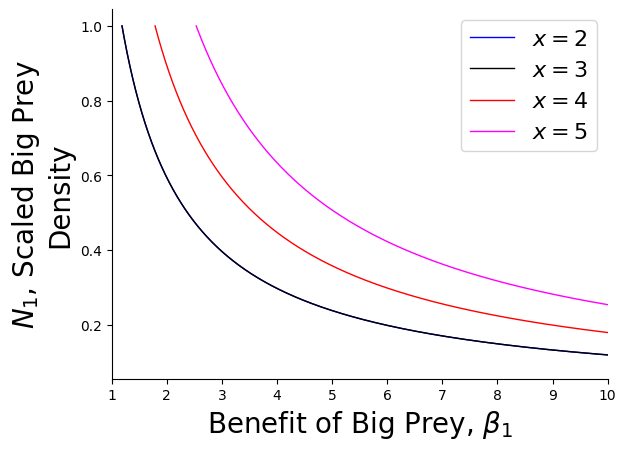

In [5]:
ax, fig = plot_set_of_curves(H1 = 1., H2 = 1., 
                             if_scale = True, 
                             α2_fun_type = 'constant')
fig.savefig(final_fig_path + 'condition_x_forms_constant.eps', **figure_ops)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


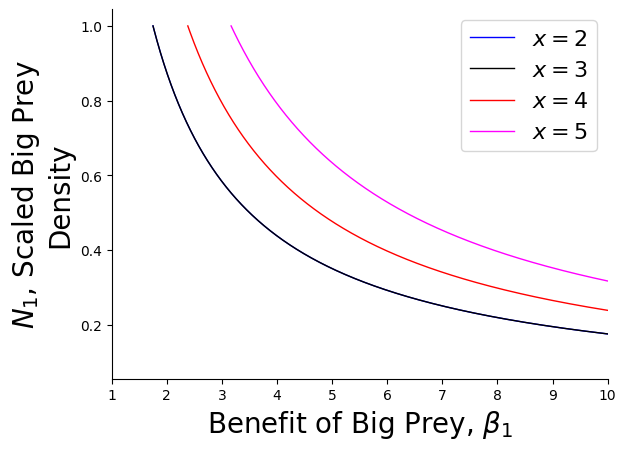

In [11]:
ax, fig = plot_set_of_curves(H1 = 1., H2 = 1., 
                             if_scale = True, 
                             α2_fun_type = 'sigmoid')
fig.savefig(final_fig_path + 'condition_x_forms_sigmoid.eps', **figure_ops)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


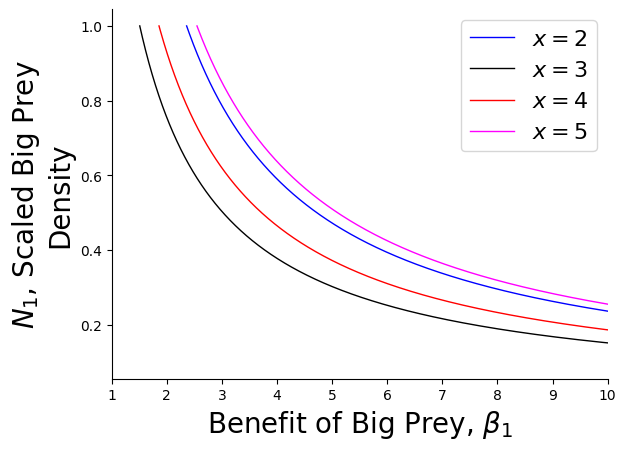

In [17]:
ax, fig = plot_set_of_curves(H1 = 1., H2 = 1, α2_fun_type = 'constant', if_scale = True,s1 = 2.4)
fig.savefig(final_fig_path + 'condition_x_forms_constant_s_2_4.eps', **figure_ops)

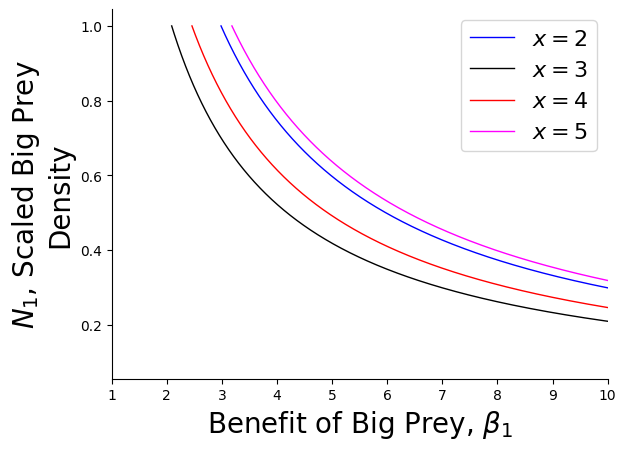

In [14]:
ax, fig = plot_set_of_curves(H1 = 1., H2 = 1, 
                             α2_fun_type = 'sigmoid', if_scale = True,
                             s1 = 2.4, s2 = 2.4)
#fig.savefig(final_fig_path + 'condition_x_forms_constant_s_2_4.eps', **figure_ops)

# If time to catch prey is not negligible

In [49]:
params = dict(α1_of_1 = 0.05, α2_of_1 = 0.95, s1 = 2, s2 = 2,
              α2_fun_type = 'constant', H1a = 0.05, H2a = 0.05, 
              H1b = 1, H2b = 1, β1 = 1, β2 = 1,
              A1=0.5, A2 = 0.5)

In [104]:
# Define parameter ranges

def plot_heatmap_c2a(x, N2,params):
    
    N1_values = np.linspace(.01, 1, 300)  # Range for N1
    B_end = 8
    B_values = np.linspace(1.1, B_end, 300)  # Range for B = beta1/beta2
    
    # Constants (assumed or require user input)
    N2 = 0.5  # Example value for N2
    
    
    # make alpha easier to call
    alpha1 = lambda x: fun_alpha1(x,**params.copy())
    alpha2 = lambda x: fun_alpha2(x,**params.copy())
    
    H2a_values = np.zeros((len(N1_values), len(B_values)))
    
    A1 = params['A1']; A2 = params['A2']
    for i, N1 in enumerate(N1_values):
        for j, B in enumerate(B_values):
            numerator = (A1 * B / A2) * N1 * (alpha1(x) - x * alpha1(1)) - N2 * (x * alpha2(1) - alpha2(x))
            denominator = ((x - 1) *
                           ((A1 * B / A2) * N1 * alpha1(1) + N2 * alpha2(1)) *
                           ((A1 * B / A2) * N1 * alpha1(x) + N2 * alpha2(x)))
            H2a_values[i, j] = numerator / denominator if denominator != 0 else np.nan  # Avoid division by zero
    # Create a masked array to distinguish negative values
    H2a_masked = np.ma.masked_less(H2a_values, 0)
    
    # Create heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(H2a_masked, aspect='auto', origin='lower',
               extent=[B_values.min(), B_values.max(), N1_values.min(), N1_values.max()],
               cmap='hot')
    
    # Overlay a distinct color (e.g., blue) for negative values
    # plt.imshow(H2a_values < 0, aspect='auto', origin='lower',
    #            extent=[B_values.min(), B_values.max(), N1_values.min(), N1_values.max()],
    #            cmap='cool', alpha=0.5)
    
    
    # Colorbar for H2a values
    cbarlab = r'Upper bound of $H_{2a}$'
    cbar = plt.colorbar(label=cbarlab)
    cbar.set_label(label = cbarlab, fontsize=18)
    plt.xlabel(r'$B = \beta_1 / \beta_2$')
    plt.ylabel(r'$N_1$')
    plt.title(r'Heat Map of $H_{2a}$ Upper Bound')
    
    # Add a legend manually for the marked-off region
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='white', edgecolor='black', 
                             label=r'Invalid ($H_{2a} < 0$)')]
    plt.legend(handles=legend_elements, loc='lower right', fontsize = 18)
    
    
    # plot cutoff where H2a = 0
        
    B_values = np.array([curve_xgroup_form(x,N1,N2,
                                                if_scale = True,
                                                **params.copy()) for N1 in N1_values])
    mask_stop = B_values<=B_end
    plt.plot(B_values[mask_stop],N1_values[mask_stop], 'k', lw = 4)
    format_ax(xlab = param_lab_dic['scale'], ylab = N1lab, ax = plt.gca(), if_legend=False)
    return plt.gcf()



In [112]:
s1 = 3
params = dict(α1_of_1 = 0.05, α2_of_1 = 0.95, s1 = s1, s2 = 2,
              α2_fun_type = 'constant', H1a = 0.05, H2a = 0.05, 
              H1b = 1, H2b = 1, β1 = 1, β2 = 1,
              A1=0.5, A2 = 0.5)

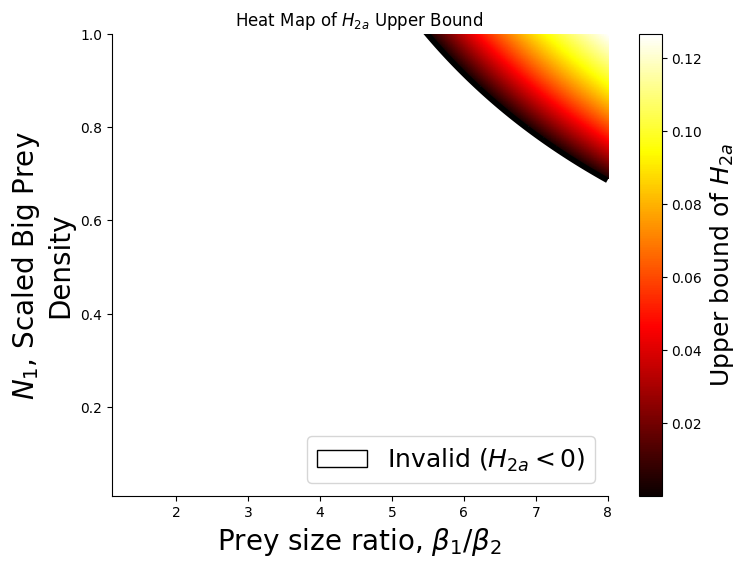

In [111]:
fig = plot_heatmap_c2a(x=2, N2 = 0.5,params = params)

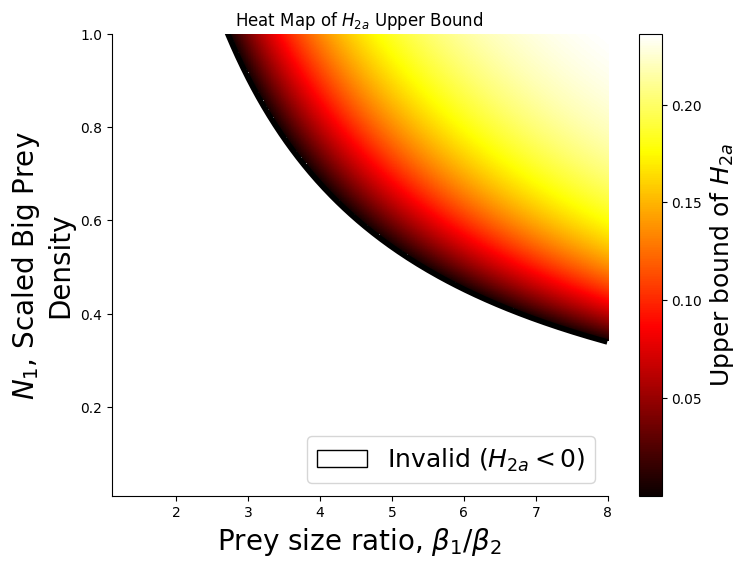

In [110]:
fig = plot_heatmap_c2a(x=3, N2 = 0.5,params = params)

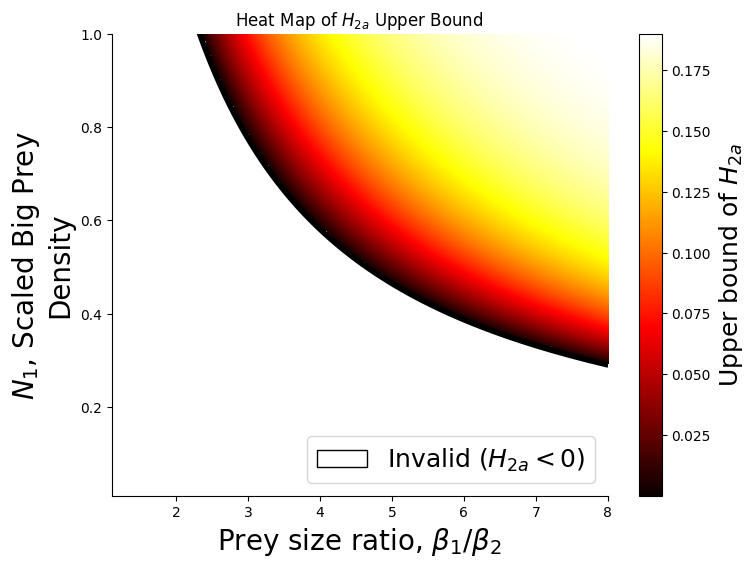

In [113]:
fig = plot_heatmap_c2a(x=4, N2 = 0.5,params = params)

# Old Code

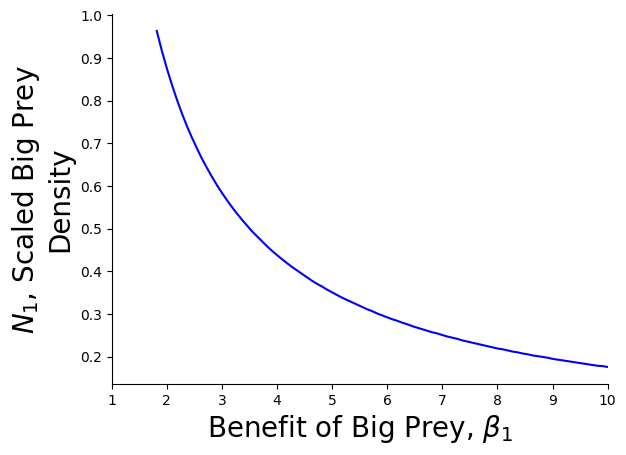

In [7]:
# Define the base parameters
H2 = 2

params_base = dict(β1=4, β2=1, H1=H2, H2=H2, 
                   α1_of_1=0.05, α2_of_1=0.95, 
                   s1=2, s2=2, A=0.5,
                   α2_fun_type='sigmoid')


# Define the range for N1
N1_values = np.linspace(0.1, 1, 1000)  # Finer range for N1
N2 = 0.5  # Example value for N2
x1, x2 = 1, 2  # Group sizes to compare
beta1_values = np.linspace(1,10,100)
    
# Prepare the data for plotting
N1_greater_fitness = []
N1_greater_fitness3 = []
'''
def compare_x_to_1(N1_greater_fitnessx, fitness_alone, fitness_x):
    greater_fitness_indices = np.where(fitness_x > fitness_alone)[0]
    if len(greater_fitness_indices) > 0:
        min_N1 = N1_values[greater_fitness_indices[0]]
    else:
        min_N1 = None
    N1_greater_fitnessx.append(min_N1)
    return N1_greater_fitnessx
'''
    
for beta1 in beta1_values:
    params = params_base.copy()
    params['β1'] = beta1
    params['H1'] = beta1*H2
    fitness_alone = per_capita_fitness_from_prey_non_dim(1, N1_values, N2, **params) # fitness of being alone
    fitness_pair = per_capita_fitness_from_prey_non_dim(2, N1_values, N2, **params) # fitness of being in a pair
    #fitness_trio = per_capita_fitness_from_prey_non_dim(3, N1_values, N2, **params) # fitness of being in a pair

    # find indices where fitness of being in a pair better than that of being alone
    greater_fitness_indices = np.where(fitness_pair > fitness_alone)[0]
    if len(greater_fitness_indices) > 0:
        min_N1 = N1_values[greater_fitness_indices[0]]
    else:
        min_N1 = None
    N1_greater_fitness.append(min_N1)

    # find indices where fitness of being in a trio better than that of being alone
    #N1_greater_fitness3 = compare_x_to_1(N1_greater_fitness3, fitness_alone, fitness_trio)
    

# Create the plot
fig, ax = plt.subplots(1, 1)
ax.plot(beta1_values, N1_greater_fitness, color='b')

# Format the plot using the provided function
format_ax(ax, r'Benefit of Big Prey, $\beta_1$', N1lab, if_legend=False, xlim = [1,10])
#fig.savefig(final_fig_path + 'N1_to_form_grps_beta1.png', bbox_inches = 'tight')
